In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing libraries
import cv2
import os 
from keras import models, layers
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from cv2 import imread
from google.colab.patches import cv2_imshow
from cv2 import waitKey, destroyAllWindows, rectangle
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from tensorflow import keras

## **Dataset**

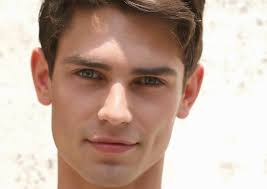

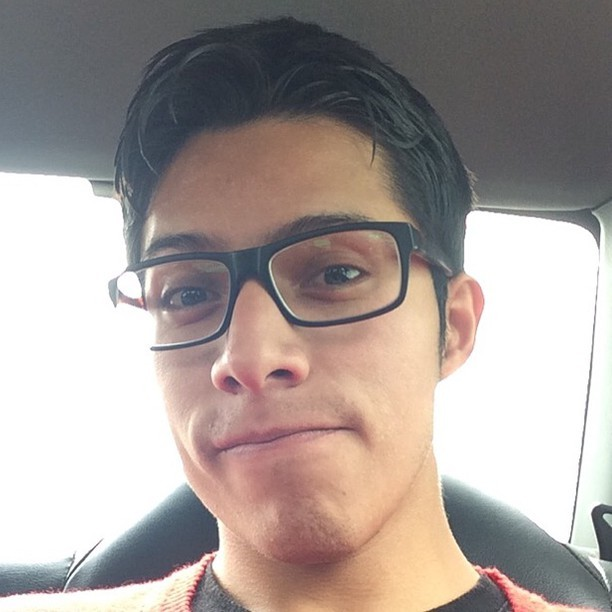

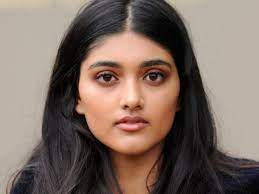

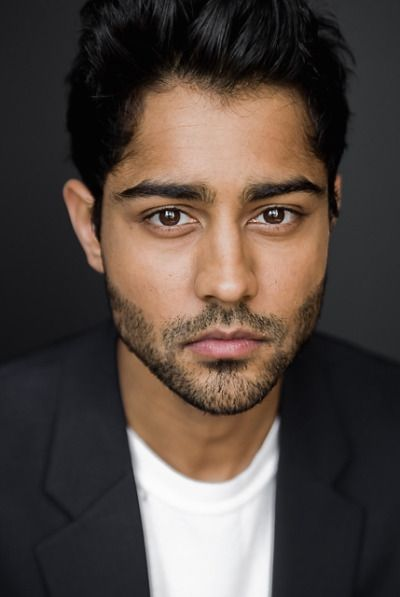

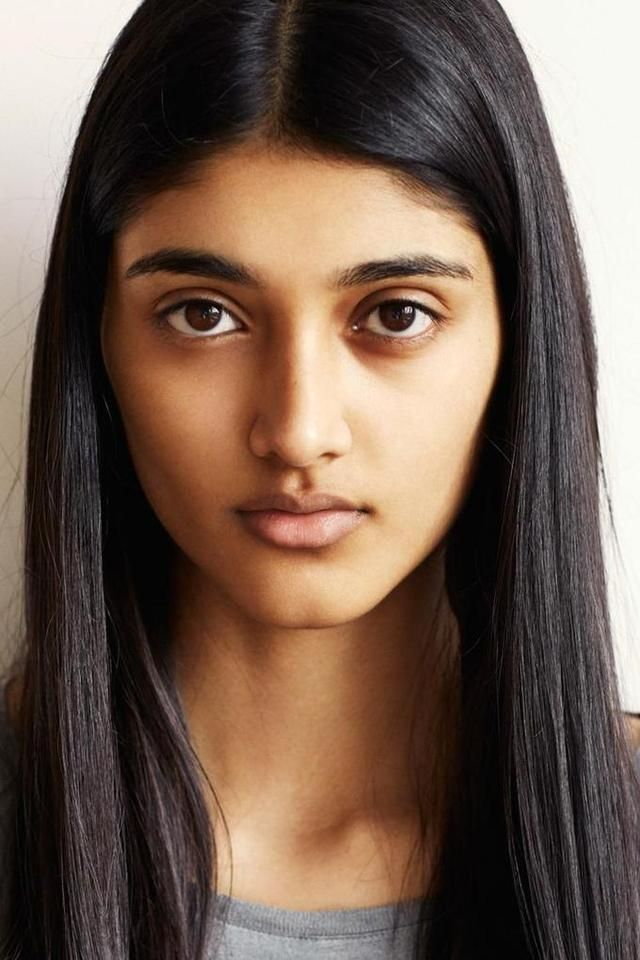

In [ ]:
folder = "/content/drive/MyDrive/SM_II/SM2 Project/data/Adult"
i = 0

for filename in os.listdir(folder):
  if i < 5:
    img = cv2.imread(os.path.join(folder,filename))
    cv2_imshow(img)
    print("\n")
    i = i + 1


In [ ]:
folder = "/content/drive/MyDrive/SM_II/SM2 Project/data/Adult"
i = 0

for filename in os.listdir(folder):
  if i < 5:
    img = cv2.imread(os.path.join(folder,filename))
    cv2_imshow(img)
    print("\n")
    i = i + 1

## **Data Preprocessing**

#### **Face Detection using Multi-task Cascaded Convolutional Networks (MTCNN)** 

Multi-task Cascaded Convolutional Networks (MTCNN) is a framework developed as a solution for both face detection and face alignment. The process consists of three stages of convolutional networks that are able to recognize faces.

In [ ]:
!pip install mtcnn

In [ ]:
from mtcnn.mtcnn import MTCNN

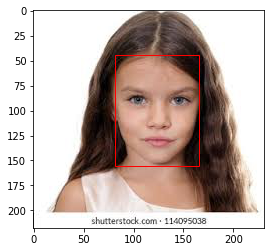

In [ ]:
def draw_image_with_boxes(filename, result_list):
	data = pyplot.imread(filename)
	pyplot.imshow(data)
	ax = pyplot.gca()
	for result in result_list:
		x, y, width, height = result['box']
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		ax.add_patch(rect)
	pyplot.show()

filename = '/content/drive/MyDrive/SM_II/SM2 Project/everything/01-09/cd.jpg'
pixels = pyplot.imread(filename)

detector = MTCNN()
faces = detector.detect_faces(pixels)

draw_image_with_boxes(filename, faces)

In [ ]:
def face_detection(img_file):
  filename = img_file
  pixels = pyplot.imread(filename)
  detector = MTCNN()
  faces = detector.detect_faces(pixels) # detect faces in the image

  def draw_faces(filename, result_list): # display faces on the original image
    data = cv2.imread(filename)
    for i in range(len(result_list)):
      x1, y1, width, height = result_list[i]['box']
      x2, y2 = x1 + width, y1 + height
      snip = data[y1:y2, x1:x2]
      return snip

  return draw_faces(filename, faces)

#### **Cropping images and storing them in Drive with 150*150 images**


In [ ]:
'''
folder = "/content/drive/MyDrive/SM_II/SM2 Project/everything/01-09"
path = "/content/drive/MyDrive/SM_II/SM2 Project/check/Child"
i = 0

for filename in os.listdir(folder):
  img = cv2.imread(os.path.join(folder,filename))
  if img is not None:
    snip = face_detection(os.path.join(folder,filename))
    resize_img = cv2.resize(snip,(150,150))
    cv2.imwrite(f'{path}/{i}.jpg',resize_img)
    i = i + 1
'''

'\nfolder = "/content/drive/MyDrive/SM2 Project/everything/01-09"\npath = "/content/drive/MyDrive/SM2 Project/check/Child"\ni = 0\n\nfor filename in os.listdir(folder):\n  img = cv2.imread(os.path.join(folder,filename))\n  if img is not None:\n    snip = face_detection(os.path.join(folder,filename))\n    resize_img = cv2.resize(snip,(150,150))\n    cv2.imwrite(f\'{path}/{i}.jpg\',resize_img)\n    i = i + 1\n'

In [ ]:
'''
folder = "/content/drive/MyDrive/SM_II/SM2 Project/everything/18-30"
path = "/content/drive/MyDrive/SM_II/SM2 Project/check/Adult"
i = 0

for filename in os.listdir(folder):
  img = cv2.imread(os.path.join(folder,filename))
  if img is not None:
    snip = face_detection(os.path.join(folder,filename))
    resize_img = cv2.resize(snip,(150,150))
    cv2.imwrite(f'{path}/{i}.jpg',resize_img)
    i = i + 1
'''

'\nfolder = "/content/drive/MyDrive/SM2 Project/everything/18-30"\npath = "/content/drive/MyDrive/SM2 Project/check/Adult"\ni = 0\n\nfor filename in os.listdir(folder):\n  img = cv2.imread(os.path.join(folder,filename))\n  if img is not None:\n    snip = face_detection(os.path.join(folder,filename))\n    resize_img = cv2.resize(snip,(150,150))\n    cv2.imwrite(f\'{path}/{i}.jpg\',resize_img)\n    i = i + 1\n'

In [ ]:
'''
folder = "/content/drive/MyDrive/SM_II/SM2 Project/everything/60+"
path = "/content/drive/MyDrive/SM_II/SM2 Project/check/Elder"
i = 0

for filename in os.listdir(folder):
  img = cv2.imread(os.path.join(folder,filename))
  if img is not None:
    snip = face_detection(os.path.join(folder,filename))
    resize_img = cv2.resize(snip,(150,150))
    cv2.imwrite(f'{path}/{i}.jpg',resize_img)
    i = i + 1
'''

'\nfolder = "/content/drive/MyDrive/SM2 Project/everything/60+"\npath = "/content/drive/MyDrive/SM2 Project/check/Elder"\ni = 0\n\nfor filename in os.listdir(folder):\n  img = cv2.imread(os.path.join(folder,filename))\n  if img is not None:\n    snip = face_detection(os.path.join(folder,filename))\n    resize_img = cv2.resize(snip,(150,150))\n    cv2.imwrite(f\'{path}/{i}.jpg\',resize_img)\n    i = i + 1\n'

#### **Converting images to grayscale and storing them as an array**

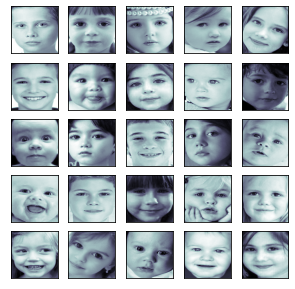

In [ ]:
folder = "/content/drive/MyDrive/SM_II/SM2 Project/check/Child"

images10 = []
for filename in os.listdir(folder):
  img = cv2.imread(os.path.join(folder,filename))
  if img is not None:
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images10.append(grey_image)

images10=np.array(images10)
images10_0 = images10/255.0

fig = plt.figure(figsize = (5,5))
# plot several images
for i in range(25):
  ax = fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
  ax.imshow(images10[i], cmap=plt.cm.bone)

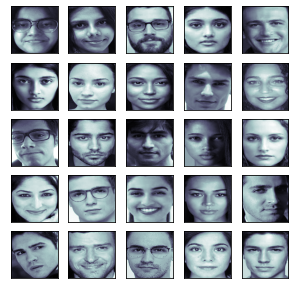

In [ ]:
folder = "/content/drive/MyDrive/SM_II/SM2 Project/check/Adult"

images10 = []
for filename in os.listdir(folder):
  img = cv2.imread(os.path.join(folder,filename))
  if img is not None:
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images10.append(grey_image)

images10=np.array(images10)
images10_1 = images10/255.0

fig = plt.figure(figsize = (5,5))
# plot several images
for i in range(25):
  ax = fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
  ax.imshow(images10[i], cmap=plt.cm.bone)

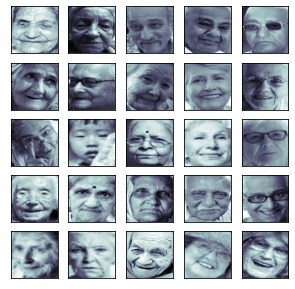

In [ ]:
folder = "/content/drive/MyDrive/SM_II/SM2 Project/check/Elder"

images10 = []
for filename in os.listdir(folder):
  img = cv2.imread(os.path.join(folder,filename))
  if img is not None:
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images10.append(grey_image)

images10=np.array(images10)
images10_2 = images10/255.0

fig = plt.figure(figsize = (5,5))
# plot several images
for i in range(25):
  ax = fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
  ax.imshow(images10[i], cmap=plt.cm.bone)

### **Storing image data in variables** 



In [ ]:
X = np.concatenate([images10_0,images10_1,images10_2])
Y = np.concatenate([[0]*130,[1]*130,[2]*130])
Y = Y.reshape(390,)
Y = to_categorical(Y)
X.shape, Y.shape

((390, 150, 150), (390, 3))

## **Model Building**

### Model 1: Neural Network with three layers

In [ ]:
from sklearn.model_selection import train_test_split

X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X,Y, test_size=0.2, random_state=42)
ya_an = [X_test_NN[25],X_train_NN[295]]
X_train_NN.shape, X_test_NN.shape, y_train_NN.shape, y_test_NN.shape

((312, 150, 150), (78, 150, 150), (312, 3), (78, 3))

In [ ]:
NN = models.Sequential()
NN.add(layers.Flatten(input_shape = (150,150)))
NN.add(layers.Dense(512, activation = "relu"))
NN.add(layers.Dense(120, activation = "relu"))
NN.add(layers.Dense(3, activation = "softmax"))

In [ ]:
NN.summary()

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 22500)             0         
_________________________________________________________________
dense_101 (Dense)            (None, 512)               11520512  
_________________________________________________________________
dense_102 (Dense)            (None, 120)               61560     
_________________________________________________________________
dense_103 (Dense)            (None, 3)                 363       
Total params: 11,582,435
Trainable params: 11,582,435
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = NN.fit(X_train_NN,y_train_NN,epochs=10, validation_data = (X_test_NN, y_test_NN))

Epoch 1/10
10/10 [==============================] - 1s 85ms/step - loss: 12.0731 - accuracy: 0.3526 - val_loss: 3.6668 - val_accuracy: 0.3718
Epoch 2/10
10/10 [==============================] - 1s 72ms/step - loss: 2.3938 - accuracy: 0.5609 - val_loss: 1.9228 - val_accuracy: 0.5385
Epoch 3/10
10/10 [==============================] - 1s 71ms/step - loss: 2.1803 - accuracy: 0.5897 - val_loss: 1.8059 - val_accuracy: 0.5897
Epoch 4/10
10/10 [==============================] - 1s 72ms/step - loss: 1.8777 - accuracy: 0.6090 - val_loss: 3.4734 - val_accuracy: 0.4744
Epoch 5/10
10/10 [==============================] - 1s 71ms/step - loss: 2.0540 - accuracy: 0.5929 - val_loss: 0.9789 - val_accuracy: 0.6667
Epoch 6/10
10/10 [==============================] - 1s 72ms/step - loss: 2.2977 - accuracy: 0.6090 - val_loss: 3.1835 - val_accuracy: 0.5128
Epoch 7/10
10/10 [==============================] - 1s 72ms/step - loss: 1.5683 - accuracy: 0.6859 - val_loss: 1.5926 - val_accuracy: 0.6538
Epoch 8/10
1

**Image Classification**

In [ ]:
class_names = ["Chlid", "Adult", "Elder"]

# Function to print probablity of classification on the images
def plot_image(predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.bone)
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = '#012e56'
  else:
    color = '#6d0808'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
import tensorflow as tf

probability_model = tf.keras.Sequential([NN, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test_NN)

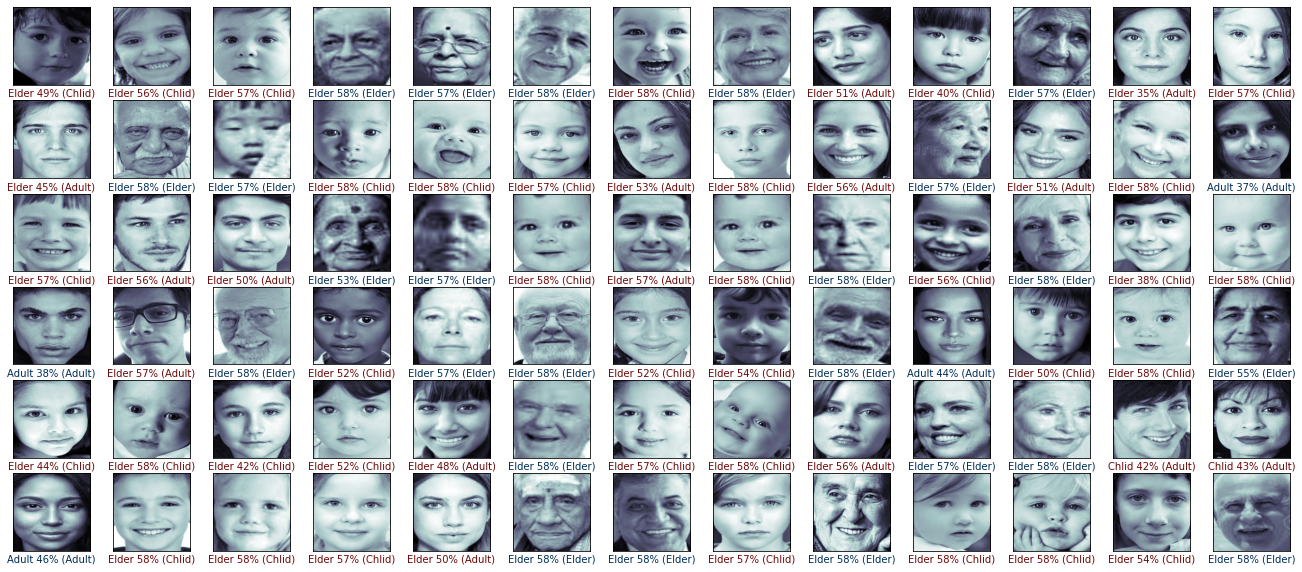

In [ ]:
fig = plt.figure(figsize = (23,10))
for i in range(78):
  ax = fig.add_subplot(6,13,i+1,xticks=[],yticks=[])
  plot_image(predictions[i], y_test_NN[i], X_test_NN[i])

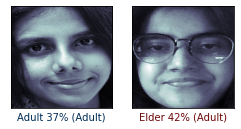

In [ ]:
# Classifiaction on our Images 
ya_an = np.concatenate([[X_test_NN[25]],[X_train_NN[295]]])
y_us = np.concatenate([[y_test_NN[25]],[y_train_NN[295]]])

prob_model_us = tf.keras.Sequential([NN, tf.keras.layers.Softmax()])
pred_us = prob_model_us.predict(ya_an)
fig = plt.figure(figsize = (4,4))
for i in range(2):
  ax = fig.add_subplot(1,2,i+1,xticks=[],yticks=[])
  plot_image(pred_us[i], y_us[i], ya_an[i])

In [ ]:
test_loss, test_accuracy = NN.evaluate(X_test_NN, y_test_NN)
print("Accuracy of Basic Neural Networks Model: ", test_accuracy*100)

3/3 [==============================] - 0s 16ms/step - loss: 2.9870 - accuracy: 0.3590
Accuracy of Basic Neural Networks Model:  35.89743673801422


### Visualisation of training results

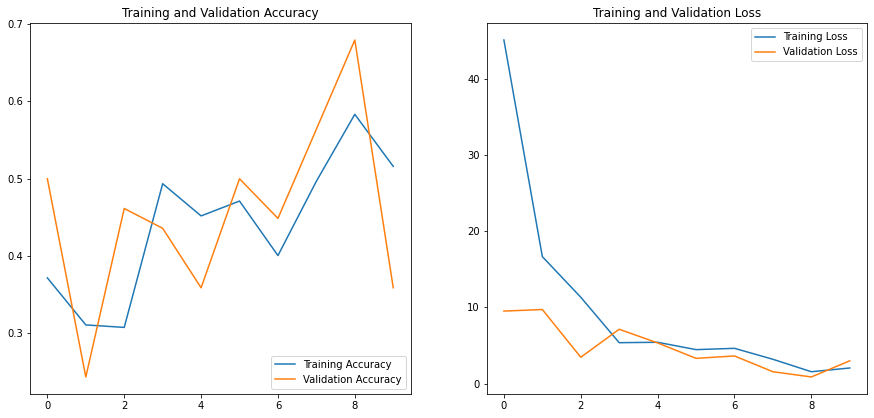

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### PCA

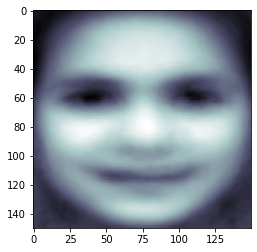

In [ ]:
pca_final = PCA(150)
pca_final.fit(X.reshape((390,150*150)))
plt.imshow(pca_final.mean_.reshape(X[300].shape), cmap=plt.cm.bone)

In [ ]:
projected = pca_final.fit_transform(X.reshape((390,150*150)))
projected.shape

(390, 150)

In [ ]:
proj_X_train, proj_X_test, proj_y_train, proj_y_test = train_test_split(projected,Y, test_size = 0.2, random_state=42)
proj_X_train.shape, proj_X_test.shape, proj_y_train.shape, proj_y_test.shape

((312, 150), (78, 150), (312, 3), (78, 3))

In [ ]:
PCA_NN=models.Sequential()
PCA_NN.add(layers.Flatten(input_shape=(projected.shape[1],)))
PCA_NN.add(layers.Dense(512,activation='relu'))
PCA_NN.add(layers.Dense(120,activation='relu'))
#PCA_NN.add(layers.Dense(64,activation='tanh'))
PCA_NN.add(layers.Dense(3,activation='softmax'))

PCA_NN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = PCA_NN.fit(proj_X_train, proj_y_train,epochs = 10,validation_data = (proj_X_test, proj_y_test))

Epoch 1/10
10/10 [==============================] - 1s 19ms/step - loss: 0.9662 - accuracy: 0.6154 - val_loss: 0.8743 - val_accuracy: 0.6410
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2424 - accuracy: 0.9327 - val_loss: 0.8529 - val_accuracy: 0.6923
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1149 - accuracy: 0.9808 - val_loss: 0.9963 - val_accuracy: 0.7051
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0510 - accuracy: 0.9936 - val_loss: 0.9660 - val_accuracy: 0.7308
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9968 - val_loss: 1.0119 - val_accuracy: 0.6795
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 1.0864 - val_accuracy: 0.6795
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.1292 - val_accuracy: 0.7051
Epoch 8/10
10/10 [=

Image Classification 

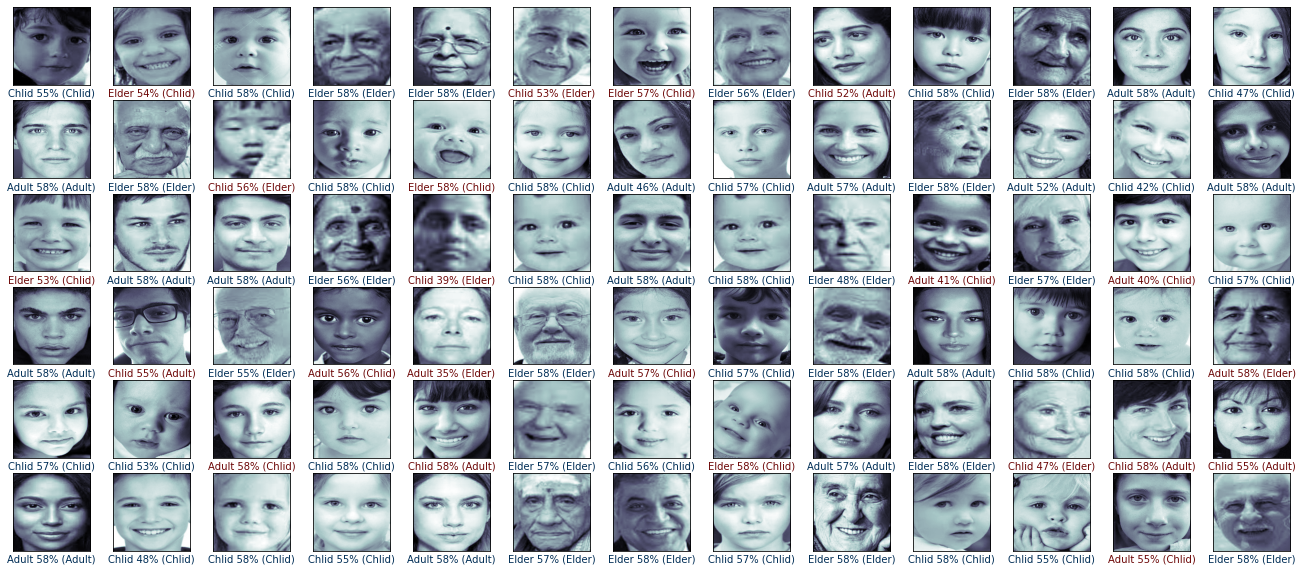

In [ ]:
probability_model_pca = tf.keras.Sequential([PCA_NN, tf.keras.layers.Softmax()])
predictions_pca = probability_model_pca.predict(proj_X_test)

fig = plt.figure(figsize = (23,10))
for i in range(78):
  ax = fig.add_subplot(6,13,i+1,xticks=[],yticks=[])
  plot_image(predictions_pca[i], y_test_NN[i], X_test_NN[i])

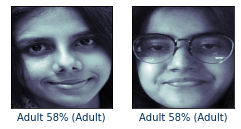

In [ ]:
# Classifiaction on our Images 
#history = PCA_NN.fit(proj_X_train, proj_y_train,epochs = 10,validation_data = (proj_X_test, proj_y_test))

ya_an2 = np.concatenate([[proj_X_test[25]],[proj_X_train[295]]])
y_us = np.concatenate([[proj_y_test[25]],[proj_y_train[295]]])

prob_model_us_pca = tf.keras.Sequential([PCA_NN, tf.keras.layers.Softmax()])
pred_us_pca = prob_model_us_pca.predict(ya_an2)
fig = plt.figure(figsize = (4,4))
for i in range(2):
  ax = fig.add_subplot(1,2,i+1,xticks=[],yticks=[])
  plot_image(pred_us_pca[i], y_us[i], ya_an[i])

In [ ]:
test_loss, test_accuracy = PCA_NN.evaluate(proj_X_test, proj_y_test)
print("Accuracy of Neural Networks Model with PCA: ", test_accuracy*100)

3/3 [==============================] - 0s 4ms/step - loss: 1.3592 - accuracy: 0.7179
Accuracy of Neural Networks Model with PCA:  71.79487347602844


### Visualisation of training results

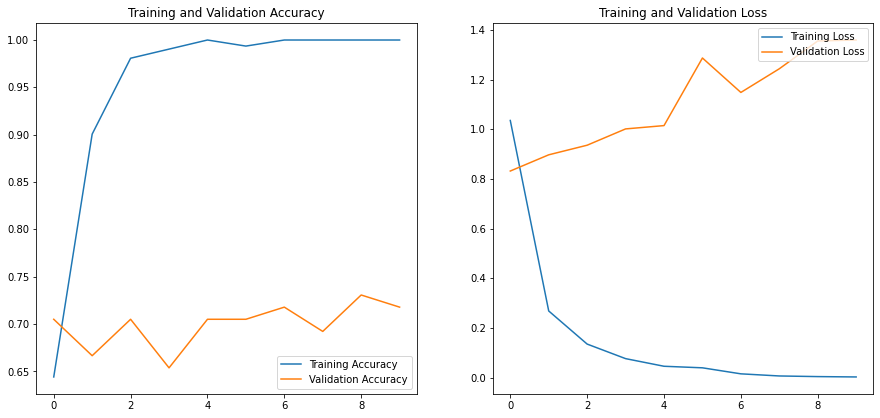

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()